#### K Ravi Teja
#### Task-2
#### Prediction using Decision Tree  Algorithm

In [1]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=42e88bf2e89223f64d0506a51c1806e11fc0cf0f8b91521c67ec5f5b90fda9a1
  Stored in directory: c:\users\ravi\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [2]:
#For Manuplating Dataset
import pandas as pd

#For Visualizing the Data
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns

#For Building Model
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [4]:
data=pd.read_csv("iris.csv")

In [5]:
#To view first 5 rows of data
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#To view last 5 rows of data
data.tail()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
# To view information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
# T o view the count of each species in the data
data['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [9]:
# Dropping Id column which is not used anywhere
# We can drop only once if we reexecute this command it indicates error
data = data.drop(['Id'], axis =1)

In [10]:
# Replacing species names with encoded values
data=data.replace(to_replace={'Species':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}})
data['Species'] = data['Species'].astype('category').cat.codes

In [11]:
# AFter modification final data is
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


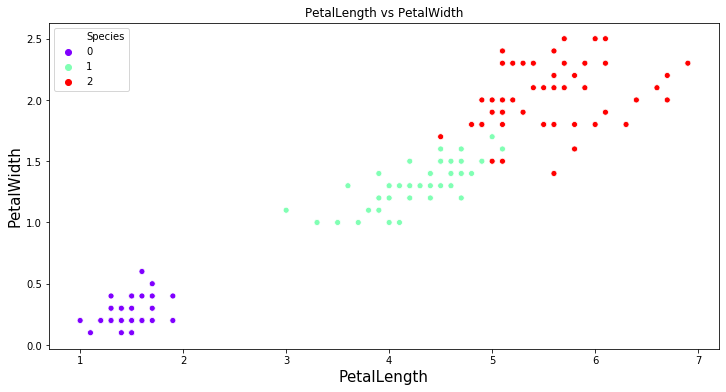

In [12]:
plt.figure(figsize=(12,6))
sns.scatterplot(data["PetalLengthCm"] ,data['PetalWidthCm'],hue=data['Species'],palette="rainbow")
plt.title("PetalLength vs PetalWidth")
plt.xlabel("PetalLength",fontsize=15)
plt.ylabel("PetalWidth",fontsize=15)
plt.show()

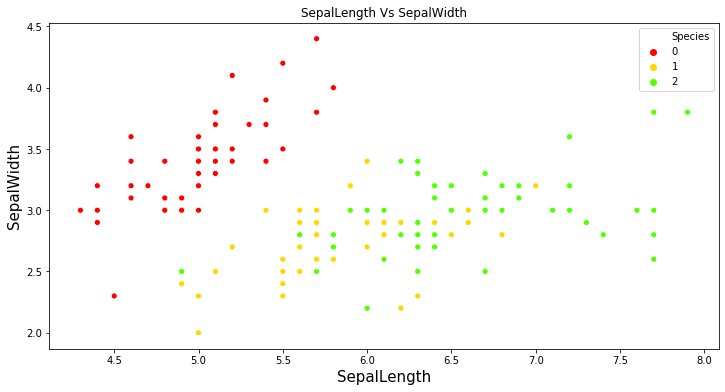

In [13]:
plt.figure(figsize=(12,6))
sns.scatterplot(data["SepalLengthCm"] ,data['SepalWidthCm'],hue=data['Species'],palette="prism")
plt.title("SepalLength Vs SepalWidth")
plt.xlabel("SepalLength",fontsize=15)
plt.ylabel("SepalWidth",fontsize=15)
plt.show()

[]

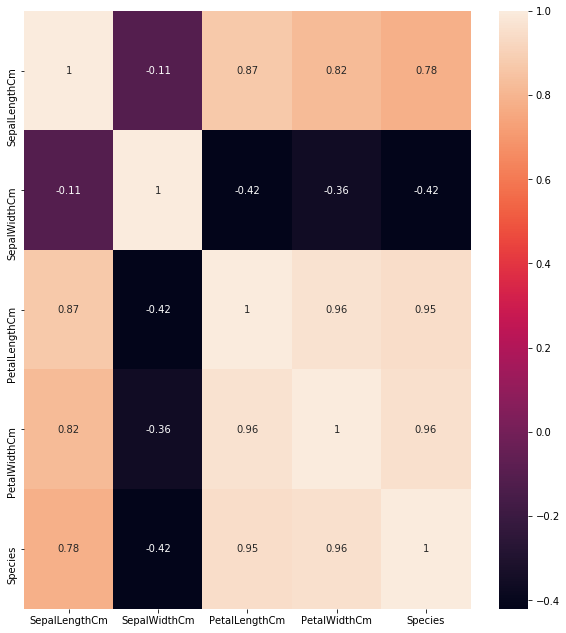

In [14]:
#Checking Correlation

plt.figure(figsize=(10,11))
sns.heatmap(data.corr(),annot=True)
plt.plot()

In [15]:
x = data.drop(['Species'], axis =1)
y = data['Species']

In [16]:
# Splitting the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [17]:
# It is one of the most important step we need to scale the values.
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [18]:
# Create an DecisionTreeClassifier instance
# Here Iam using criteria as 'Entropy'
model = DecisionTreeClassifier (criterion='gini',random_state=0)

# Fitting the training data
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [19]:
# Predicting the values
y_pred = model.predict(x_test)

In [20]:
# Finding Accuracy Score
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score is  \t",accuracy*100)

Accuracy Score is  	 91.11111111111111


In [21]:
# Confusion Matrix
matrix=confusion_matrix(y_test,y_pred)
print('confusion matrix \n',matrix)

confusion matrix 
 [[16  0  0]
 [ 0 14  4]
 [ 0  0 11]]


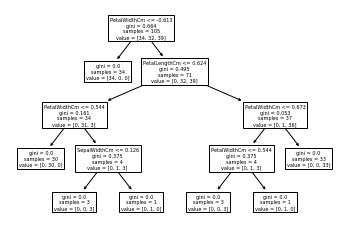

In [22]:
# Plotting the Tree
plt.figure()
feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
tree.plot_tree(model,feature_names =feature_names);
#Saving th Tree figure as png
plt.savefig('tree.png',format='png',bbox_inches = "tight")

In [23]:
sl=float(input("Enter Sepal Length : "))
sw=float(input("Enter Sepal Width : "))
pl=float(input("Enter Petal Length : "))
pw=float(input("Enter Petal width : "))
enteredData=[[sl,sw,pl,pw]]
result=model.predict(enteredData)
r={0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'}
print("Predicted Class is",r[result[0]])

Enter Sepal Length : 2
Enter Sepal Width : 3
Enter Petal Length : 2
Enter Petal width : 1
Predicted Class is Iris-virginica
